In [1]:
# import pandas
import pandas as pd
import numpy as np

In [2]:
from google.colab import files
files.upload()

Saving cars.csv to cars.csv


{'cars.csv': b'Car,Model,Volume,Weight,CO2\r\nToyoty,Aygo,1000,790,99\r\nMitsubishi,Space Star,1200,1160,95\r\nSkoda,Citigo,1000,929,95\r\nFiat,500,900,865,90\r\nMini,Cooper,1500,1140,105\r\nVW,Up!,1000,929,105\r\nSkoda,Fabia,1400,1109,90\r\nMercedes,A-Class,1500,1365,92\r\nFord,Fiesta,1500,1112,98\r\nAudi,A1,1600,1150,99\r\nHyundai,I20,1100,980,99\r\nSuzuki,Swift,1300,990,101\r\nFord,Fiesta,1000,1112,99\r\nHonda,Civic,1600,1252,94\r\nHundai,I30,1600,1326,97\r\nOpel,Astra,1600,1330,97\r\nBMW,1,1600,1365,99\r\nMazda,3,2200,1280,104\r\nSkoda,Rapid,1600,1119,104\r\nFord,Focus,2000,1328,105\r\nFord,Mondeo,1600,1584,94\r\nOpel,Insignia,2000,1428,99\r\nMercedes,C-Class,2100,1365,99\r\nSkoda,Octavia,1600,1415,99\r\nVolvo,S60,2000,1415,99\r\nMercedes,CLA,1500,1465,102\r\nAudi,A4,2000,1490,104\r\nAudi,A6,2000,1725,114\r\nVolvo,V70,1600,1523,109\r\nBMW,5,2000,1705,114\r\nMercedes,E-Class,2100,1605,115\r\nVolvo,XC70,2000,1746,117\r\nFord,B-Max,1600,1235,104\r\nBMW,216,1600,1390,108\r\nOpel,Zafira

In [3]:
# read CSV file from the 'data' subdirectory using a relative path
data = pd.read_csv('cars.csv', index_col=0)

# display the first 5 rows
data.head(10)

,Model,Volume,Weight,CO2
Car,,,,
Toyoty,Aygo,1000,790,99
Mitsubishi,Space Star,1200,1160,95
Skoda,Citigo,1000,929,95
Fiat,500,900,865,90
Mini,Cooper,1500,1140,105
VW,Up!,1000,929,105
Skoda,Fabia,1400,1109,90
Mercedes,A-Class,1500,1365,92
Ford,Fiesta,1500,1112,98


Primary object types:

- **DataFrame:** rows and columns (like a spreadsheet)
- **Series:** a single column

In [4]:
# display the last 5 rows
data.tail()

,Model,Volume,Weight,CO2
Car,,,,
Volvo,XC70,2000,1746,117
Ford,B-Max,1600,1235,104
BMW,216,1600,1390,108
Opel,Zafira,1600,1405,109
Mercedes,SLK,2500,1395,120


In [5]:
# check the shape of the DataFrame (rows, columns)
data.shape

(36, 4)

What are the features?
- **TV:** advertising dollars spent on TV for a single product in a given market (in thousands of dollars)
- **Radio:** advertising dollars spent on Radio
- **Newspaper:** advertising dollars spent on Newspaper

What is the response?
- **Sales:** sales of a single product in a given market (in thousands of items)

What else do we know?
- Because the response variable is continuous, this is a **regression** problem.
- There are 200 **observations** (represented by the rows), and each observation is a single market.

## Visualizing data


In [6]:
# conventional way to import seaborn
import matplotlib.pyplot as plt

# allow plots to appear within the notebook
%matplotlib inline

<Axes: xlabel='Weight', ylabel='CO2'>

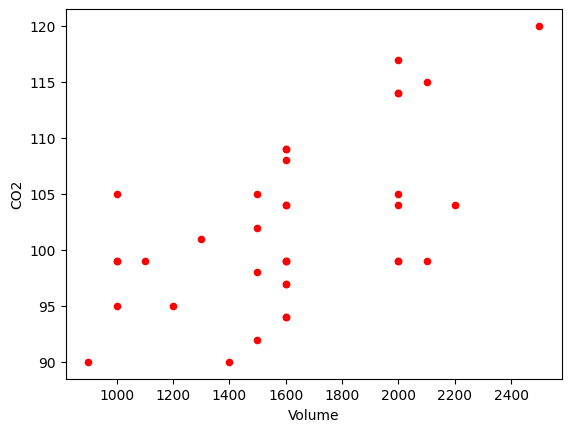

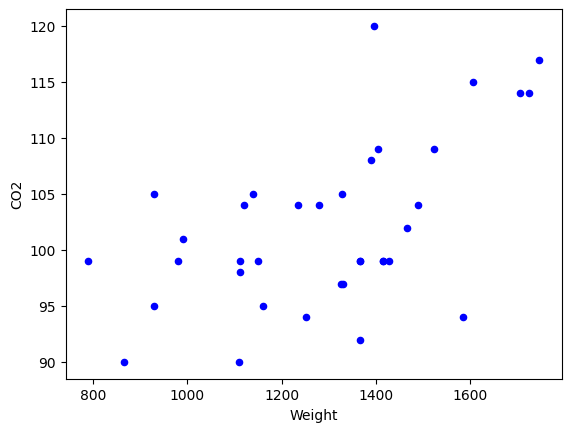

In [7]:
data.plot(kind='scatter',x='Volume',y='CO2',color='red')
data.plot(kind='scatter',x='Weight',y='CO2',color='blue')

## Linear regression

**Pros:** fast, no tuning required, highly interpretable, well-understood

**Cons:** unlikely to produce the best predictive accuracy (presumes a linear relationship between the features and response)

### Form of linear regression

$y = \beta_0 + \beta_1x_1 + \beta_2x_2 + ... + \beta_nx_n$

- $y$ is the response
- $\beta_0$ is the intercept
- $\beta_1$ is the coefficient for $x_1$ (the first feature)
- $\beta_n$ is the coefficient for $x_n$ (the nth feature)

In this case:

$y = \beta_0 + \beta_1 \times TV + \beta_2 \times Radio + \beta_3 \times Newspaper$

The $\beta$ values are called the **model coefficients**. These values are "learned" during the model fitting step using the "least squares" criterion. Then, the fitted model can be used to make predictions!

## Preparing X and y using pandas

- scikit-learn expects X (feature matrix) and y (response vector) to be NumPy arrays.
- However, pandas is built on top of NumPy.
- Thus, X can be a pandas DataFrame and y can be a pandas Series!

In [8]:
# create a Python list of feature names
feature_cols = ['Volume', 'Weight']

# use the list to select a subset of the original DataFrame
X = data[feature_cols]

# equivalent command to do this in one line
X = data[['Volume', 'Weight']]

# print the first 5 rows
X.head()


,Volume,Weight
Car,,
Toyoty,1000,790
Mitsubishi,1200,1160
Skoda,1000,929
Fiat,900,865
Mini,1500,1140


In [9]:
# check the type and shape of X
print(type(X))
print(X.shape)

<class 'pandas.core.frame.DataFrame'>
(36, 2)


In [10]:
# select a Series from the DataFrame
lab = ['CO2']

# equivalent command that works if there are no spaces in the column name
y =  data['CO2']



# print the first 5 values
y.head()

Car
Toyoty         99
Mitsubishi     95
Skoda          95
Fiat           90
Mini          105
Name: CO2, dtype: int64

In [11]:
# check the type and shape of y
print(type(y))
print(y.shape)

<class 'pandas.core.series.Series'>
(36,)


## Splitting X and y into training and testing sets

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [13]:
# default split is 75% for training and 25% for testing
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)
# X_train = X_train[:150]

print(X_test)

(27, 2)
(27,)
(9, 2)
(9,)
          Volume  Weight
Car                     
Mercedes    2100    1605
Opel        1600    1405
Volvo       1600    1523
Fiat         900     865
Ford        2000    1328
Mazda       2200    1280
Opel        2000    1428
Skoda       1600    1415
BMW         2000    1705


## Linear regression in scikit-learn

In [14]:
# import model
from sklearn.linear_model import LinearRegression

# instantiate
linreg = LinearRegression()

# fit the model to the training data (learn the coefficients)
model = linreg.fit(X_train, y_train)



### Making predictions

In [16]:
# make predictions on the testing set
y_pred = linreg.predict(X_test)
print(y_pred)
print(X_test)

[106.71253474 101.51052992 101.48682488  94.27995459 105.71974474
 107.8262606  105.69965573 101.50852101 105.64400916]
          Volume  Weight
Car                     
Mercedes    2100    1605
Opel        1600    1405
Volvo       1600    1523
Fiat         900     865
Ford        2000    1328
Mazda       2200    1280
Opel        2000    1428
Skoda       1600    1415
BMW         2000    1705


We need an **evaluation metric** in order to compare our predictions with the actual values!